In [16]:
import os
import numpy as np
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

fruitNetModel=models.Sequential()

fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Flatten())
fruitNetModel.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
fruitNetModel.add(layers.Dropout(0.2))
fruitNetModel.add(layers.Dense(2, activation='softmax'))

fruitNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
fruitNetModel.summary()

filepath="FruitNet_Indus_Fruits_2_classes.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 61, 61, 128)       0         
__________

In [4]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Train'
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Validation'
test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset\\Test'

In [5]:
import os
import shutil
import glob
import random

CATEGORIES=os.listdir(train_dir)

for category in CATEGORIES:
    src_path=os.path.join(train_dir,category)
    imgs_to_be_moved = random.sample(glob.glob(os.path.join(src_path,"*.jpg")), 40)
    for img in enumerate(imgs_to_be_moved):
        dest = os.path.join(validation_dir,category)
        if not os.path.exists(dest):
            os.makedirs(dest)
    for img in enumerate(imgs_to_be_moved):
        shutil.copy(img[1], dest)
        os.remove(img[1])

In [6]:
for category in CATEGORIES:
    src_path=os.path.join(train_dir,category)
    imgs_to_be_moved = random.sample(glob.glob(os.path.join(src_path,"*.jpg")), 80)
    for img in enumerate(imgs_to_be_moved):
        dest = os.path.join(test_dir,category)
        if not os.path.exists(dest):
            os.makedirs(dest)
    for img in enumerate(imgs_to_be_moved):
        shutil.copy(img[1], dest)
        os.remove(img[1])

In [13]:
import cv2

resized_images_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images\\Train'
resized_images_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images\\Test'
resized_images_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images\\Validation'

CATEGORIES_TRAIN_DIR=os.listdir(train_dir)
CATEGORIES_VALIDATION_DIR=os.listdir(validation_dir)
CATEGORIES_TEST_DIR=os.listdir(test_dir)

for category in CATEGORIES_TRAIN_DIR:
    src_path=os.path.join(train_dir,category)
    dest_path = os.path.join(resized_images_train_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (256,256))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [14]:
for category in CATEGORIES_VALIDATION_DIR:
    src_path=os.path.join(validation_dir,category)
    dest_path = os.path.join(resized_images_validation_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (256,256))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [15]:
for category in CATEGORIES_TEST_DIR:
    src_path=os.path.join(test_dir,category)
    dest_path = os.path.join(resized_images_test_dir,category)
    for src_img_name in os.listdir(src_path):
        try:
            img = cv2.imread(os.path.join(src_path,src_img_name))
            img = cv2.resize(img, (256,256))
            cv2.imwrite(os.path.join(dest_path,src_img_name),img)
        except Exception as e:
            pass

In [20]:
batch_size=8

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_train_dir,
        target_size=(256, 256),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_validation_dir,
        target_size=(256, 256),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_test_dir,
        target_size=(256, 256),
        batch_size=batch_size, shuffle=False)

Found 800 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [21]:
number_of_training_samples=800
number_of_validation_samples=80
number_of_test_samples=160

In [22]:
import math

history = fruitNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=100,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Epoch 1/100
100/100 [==============================] - 28s 277ms/step - loss: 0.7046 - categorical_accuracy: 0.6388 - val_loss: 0.3204 - val_categorical_accuracy: 0.9000
Epoch 2/100
100/100 [==============================] - 25s 252ms/step - loss: 0.3598 - categorical_accuracy: 0.8988 - val_loss: 0.2742 - val_categorical_accuracy: 0.9750
Epoch 3/100
100/100 [==============================] - 25s 253ms/step - loss: 0.3065 - categorical_accuracy: 0.9225 - val_loss: 0.3216 - val_categorical_accuracy: 0.8875
Epoch 4/100
100/100 [==============================] - 25s 253ms/step - loss: 0.2500 - categorical_accuracy: 0.9350 - val_loss: 0.1375 - val_categorical_accuracy: 0.9625
Epoch 5/100
100/100 [==============================] - 25s 254ms/step - loss: 0.2674 - categorical_accuracy: 0.9275 - val_loss: 0.2150 - val_categorical_accuracy: 0.9500
Epoch 6/100
100/100 [==============================] - 25s 254ms/step - loss: 0.2451 - categorical_accuracy: 0.9313 - val_loss: 0.1324 - val_categoric

Epoch 49/100
100/100 [==============================] - 33s 334ms/step - loss: 0.0924 - categorical_accuracy: 0.9637 - val_loss: 0.0600 - val_categorical_accuracy: 0.9875
Epoch 50/100
100/100 [==============================] - 34s 340ms/step - loss: 0.0805 - categorical_accuracy: 0.9788 - val_loss: 0.0640 - val_categorical_accuracy: 0.9875
Epoch 51/100
100/100 [==============================] - 34s 343ms/step - loss: 0.1136 - categorical_accuracy: 0.9663 - val_loss: 0.0490 - val_categorical_accuracy: 0.9875
Epoch 52/100
100/100 [==============================] - 34s 345ms/step - loss: 0.0708 - categorical_accuracy: 0.9800 - val_loss: 0.0895 - val_categorical_accuracy: 0.9750
Epoch 53/100
100/100 [==============================] - 34s 345ms/step - loss: 0.0762 - categorical_accuracy: 0.9800 - val_loss: 0.0448 - val_categorical_accuracy: 0.9750
Epoch 54/100
100/100 [==============================] - 34s 345ms/step - loss: 0.0626 - categorical_accuracy: 0.9800 - val_loss: 0.0781 - val_cat

Epoch 97/100
100/100 [==============================] - 26s 262ms/step - loss: 0.0812 - categorical_accuracy: 0.9775 - val_loss: 0.0399 - val_categorical_accuracy: 1.0000
Epoch 98/100
100/100 [==============================] - 26s 262ms/step - loss: 0.0431 - categorical_accuracy: 0.9900 - val_loss: 0.0810 - val_categorical_accuracy: 0.9750
Epoch 99/100
100/100 [==============================] - 26s 262ms/step - loss: 0.0411 - categorical_accuracy: 0.9900 - val_loss: 0.0329 - val_categorical_accuracy: 0.9875
Epoch 100/100
100/100 [==============================] - 26s 263ms/step - loss: 0.0635 - categorical_accuracy: 0.9813 - val_loss: 0.0217 - val_categorical_accuracy: 1.0000


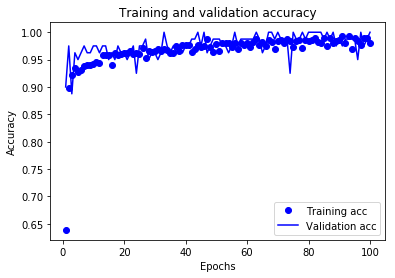

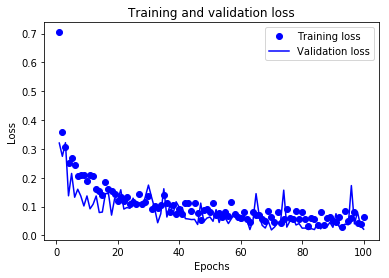

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
from tensorflow.python.keras.models import load_model

best_model = load_model('FruitNet_Indus_Fruits_2_classes.h5')
steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

20/20 [==============================] - 2s 88ms/step - loss: 0.0958 - categorical_accuracy: 0.9875
Test-set accuracy: 98.75%
